Bi-Linear Interpolation

In [3]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [4]:
def bilinear_interpolation(img, scale_factor):
    (src_height, src_width, num_channels) = img.shape

    dest_height = int(src_height * scale_factor)
    dest_width = int(src_width * scale_factor)

    height_ratio = src_height / dest_height
    width_ratio = src_width / dest_width

    dest_img = np.zeros((dest_height, dest_width, num_channels), np.uint8)

    for h in range(1, dest_height - 1):
        for w in range(1, dest_width - 1):
            src_h = int(h * height_ratio)
            src_w = int(w * width_ratio)
            h_diff = h * height_ratio - src_h
            w_diff = w * width_ratio - src_w

            dest_img[h][w] = (1-h_diff)*(1-w_diff)*img[src_h][src_w] + (1-h_diff)*w_diff*img[src_h][src_w + 1] + h_diff * (1 - w_diff) * img[src_h + 1][src_w] + h_diff * w_diff * img[src_h][src_w + 1]

    return dest_img

(1240, 2181, 3)
(1612, 2835, 3)


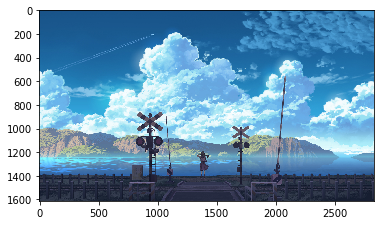

In [5]:
if __name__ == '__main__':
    img = Image.open('/home/orris/Pictures/wallpapers/1.jpg')
    img = np.asarray(img)
    print(img.shape)
    dest_img = bilinear_interpolation(img, 1.3)
    plt.figure()
    print(dest_img.shape)
    plt.imshow(dest_img)
    plt.show()